In [2]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.tokenize import word_tokenize
import re
from nltk.util import ngrams

import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

#import gensim
#from gensim import corpora

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import sklearn.feature_extraction.text as text

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
import os

In [4]:
os.chdir('C:\\Users\\prabhakar\\Downloads')

In [5]:
data = pd.read_csv('C:\\Users\\prabhakar\\Downloads\\Microsoft.SkypeApp_kzf8qxf38zg5c!App\\All\\Amazon Kindle.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58845 entries, 0 to 58844
Data columns (total 15 columns):
url                 58845 non-null object
title               52410 non-null object
author              49637 non-null object
price               51318 non-null float64
save                36314 non-null float64
pages               55729 non-null float64
description         49197 non-null object
size                50425 non-null float64
publisher           50521 non-null object
language            57136 non-null object
text_to_speech      47702 non-null object
x_ray               47713 non-null object
lending             47795 non-null object
customer_reviews    50886 non-null float64
stars               50886 non-null float64
dtypes: float64(6), object(9)
memory usage: 6.7+ MB


In [7]:
data.isnull().sum()

url                     0
title                6435
author               9208
price                7527
save                22531
pages                3116
description          9648
size                 8420
publisher            8324
language             1709
text_to_speech      11143
x_ray               11132
lending             11050
customer_reviews     7959
stars                7959
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.head(2)

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If there’s anyone who can prevent a bar or res...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2


In [10]:
data.describe()

,price,save,pages,size,customer_reviews,stars
count,32571.000000,32571.000000,32571.000000,32571.000000,32571.000000,32571.000000
mean,9.034280,8.920928,318.268705,2986.024252,116.854687,4.291978
std,8.248698,9.866907,201.921873,14425.807817,373.950367,0.455528
min,0.000000,0.010000,1.000000,33.000000,1.000000,1.000000
25%,4.990000,4.900000,224.000000,490.000000,15.000000,4.000000
50%,8.890000,7.000000,294.000000,865.000000,39.000000,4.400000
75%,9.990000,11.000000,383.000000,2011.000000,99.000000,4.600000
max,328.580000,269.460000,7100.000000,618307.000000,19723.000000,5.000000


In [11]:
import seaborn as sns

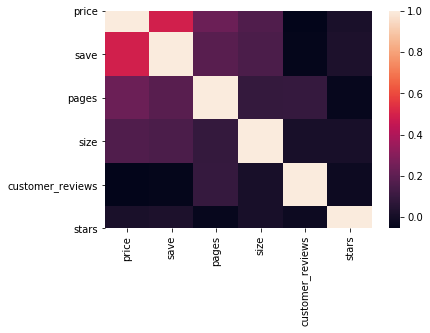

In [12]:
sns.heatmap(data.corr())

In [13]:
data.corr()

# rating is related to price

,price,save,pages,size,customer_reviews,stars
price,1.000000,0.489153,0.233525,0.162954,-0.056055,0.014894
save,0.489153,1.000000,0.184676,0.154055,-0.046905,0.023815
pages,0.233525,0.184676,1.000000,0.089886,0.096139,-0.038571
size,0.162954,0.154055,0.089886,1.000000,0.011519,0.013122
customer_reviews,-0.056055,-0.046905,0.096139,0.011519,1.000000,-0.019341
stars,0.014894,0.023815,-0.038571,0.013122,-0.019341,1.000000


In [14]:
high_price = data.sort_values(['price'],axis = 0,ascending = False)
high_price.head(1)

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
51027,http://www.amazon.com/Application-November-Edi...,How to Write a Patent Application (November 20...,Jeffrey G. Sheldon,328.58,36.42,1268.0,This benchmark resource takes the guesswork an...,40065.0,Practising Law Institute,English,Enabled,Not Enabled,Not Enabled,7.0,4.7


In [15]:
high_rated = data.sort_values(['stars'],axis = 0,ascending = False)
high_rated.head(1)

# best author - Anthony Flynn

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
9650,http://www.amazon.com/Legendary-Detective-City...,Legendary Detective in the City of Kings (Book...,Kaye Wagner,4.99,17.0,245.0,"In the City of Kings, power is the balancing b...",1019.0,Pendown Publishing; 1st edition,English,Enabled,Not Enabled,Enabled,23.0,5.0


In [16]:
max_copies = data.sort_values(['save'],axis = 0,ascending = False)
max_copies.head(10)

#Top 10 books based on Revenue
#General Chemistry [Print Replica] 
#Organizational Behavior [Print Replica]
#Principles of Corporate Finance
#Corporate Finance, 10th edition
#Managerial Accounting
#Managerial Economics and Business Strategy 
#Financial Accounting
#Fundamentals of Corporate Finance Standard
#The Collected Works of Frederick Douglass
#Finance: Applications and Theory

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
52400,http://www.amazon.com/General-Chemistry-Darrel...,General Chemistry [Print Replica] [Kindle Edit...,Darrell Ebbing,74.49,269.46,1152.0,The tenth edition of this market-leading text ...,223662.0,Cengage Learning; 10 edition,English,Not enabled,Enabled,Not Enabled,54.0,3.7
7244,http://www.amazon.com/Organizational-Behavior-...,Organizational Behavior [Print Replica] [Kindl...,Don Hellriegel,82.49,249.46,672.0,Equip your students with the skills to become ...,160003.0,Cengage Learning; 13 edition,English,Not enabled,Enabled,Not Enabled,8.0,4.2
46159,http://www.amazon.com/Principles-Corporate-Fin...,"Principles of Corporate Finance, 2nd edition (...",Franklin Allen,52.24,233.09,976.0,The integrated solutions for Brealey's Princip...,38546.0,Business And Economics; 11 edition,English,Not enabled,Not Enabled,Not Enabled,9.0,4.1
36379,http://www.amazon.com/Corporate-Finance-Mcgraw...,"Corporate Finance, 10th edition (Mcgraw-Hill/I...",Stephen Ross,52.24,233.09,1072.0,"Corporate Finance, by Ross, Westerfield, and J...",27389.0,Business And Economics; 10 edition,English,Not enabled,Enabled,Not Enabled,16.0,4.5
2243,http://www.amazon.com/Managerial-Accounting-Ro...,Managerial Accounting [Print Replica] [Kindle ...,Ronald Hilton,51.64,230.36,864.0,Course Overview: Management/Managerial Account...,64635.0,Business And Economics; 9th edition,English,Not enabled,Enabled,Not Enabled,15.0,4.1
20771,http://www.amazon.com/Managerial-Accounting-Ra...,Managerial Accounting [Print Replica] [Kindle ...,Ray Garrison,51.64,230.36,832.0,"As the long-time #1 best-seller, Garrison has ...",25283.0,Business And Economics; 14th edition,English,Not enabled,Not Enabled,Not Enabled,254.0,3.8
7245,http://www.amazon.com/Financial-Accounting-Rob...,Financial Accounting [Print Replica] [Kindle E...,Robert Libby,51.38,229.29,737.0,Libby/Libby/Short wrote this text based on the...,84040.0,Business And Economics; 7 edition,English,Not enabled,Enabled,Not Enabled,32.0,4.3
49569,http://www.amazon.com/Fundamentals-Corporate-S...,Fundamentals of Corporate Finance Standard Edi...,Stephen Ross,50.85,226.82,816.0,The best-selling Fundamentals of Corporate Fin...,26470.0,Business And Economics; 10 edition,English,Not enabled,Not Enabled,Not Enabled,30.0,4.2
31332,http://www.amazon.com/Collected-Frederick-Doug...,The Collected Works of Frederick Douglass (Une...,Frederick Douglass,1.99,223.01,298.0,This Halcyon Classics eBook contains four work...,660.0,Halcyon Press Ltd.; First edition,English,Enabled,Not Enabled,Enabled,10.0,4.6
46539,http://www.amazon.com/Finance-Applications-The...,"Finance: Applications and Theory, 2nd edition ...",John Nofsinger,47.63,212.70,736.0,"It’s About Time! Finally, there’s a corporate ...",27874.0,Business And Economics; 2 edition,English,Not enabled,Enabled,Not Enabled,3.0,4.7


In [17]:
max_copies = data.sort_values(['customer_reviews'],axis = 0,ascending = False)
max_copies.head(10)

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
6200,http://www.amazon.com/The-Hunger-Games-Suzanne...,The Hunger Games [Kindle Edition],Suzanne Collins,4.99,6.00,387.0,"Now in paperback, the book no one can stop tal...",867.0,Scholastic Press; Reprint edition,English,Enabled,Enabled,Enabled,19723.0,4.6
791,http://www.amazon.com/Gone-Girl-Novel-Gillian-...,Gone Girl: A Novel [Kindle Edition],Gillian Flynn,8.99,16.01,434.0,Marriage can be a real killer. One of the most...,1739.0,Crown,English,Enabled,Enabled,Not Enabled,15866.0,3.8
2736,http://www.amazon.com/Mockingjay-Final-Book-Hu...,Mockingjay (The Final Book of The Hunger Games...,Suzanne Collins,6.98,8.01,390.0,The greatly anticipated final book in the New ...,860.0,Scholastic Press; 1st edition,English,Enabled,Enabled,Enabled,13807.0,4.2
3402,http://www.amazon.com/Catching-Fire-Second-Hun...,Catching Fire (The Second Book of the Hunger G...,Suzanne Collins,6.22,6.77,391.0,"Against all odds, Katniss Everdeen has won the...",921.0,Scholastic Press,English,Enabled,Enabled,Enabled,13191.0,4.6
8669,http://www.amazon.com/Catching-Fire-Tie-Editio...,Catching Fire: Movie Tie-in Edition: The Secon...,Suzanne Collins,5.96,7.03,403.0,"Catching Fire, the second book in the New York...",1804.0,Scholastic Paperbacks; Mti edition,English,Enabled,Enabled,Enabled,13191.0,4.6
217,http://www.amazon.com/Divergent-Series-Veronic...,Divergent (Divergent Series) [Kindle Edition],Veronica Roth,4.66,5.33,501.0,"In Beatrice Prior's dystopian Chicago, society...",706.0,Katherine Tegen Books,English,Enabled,Enabled,Not Enabled,9287.0,4.6
12225,http://www.amazon.com/Fifty-Shades-Freed-Three...,Fifty Shades Freed: Book Three of the Fifty Sh...,E L James,7.80,8.15,594.0,When unworldly student Anastasia Steele first ...,1502.0,Vintage; Reprint edition,English,Enabled,Enabled,Not Enabled,9217.0,4.3
15047,http://www.amazon.com/Fifty-Shades-Darker-Book...,Fifty Shades Darker: Book Two of the Fifty Sha...,E L James,7.64,8.31,546.0,Daunted by the singular tastes and dark secret...,2118.0,Vintage,English,Enabled,Enabled,Not Enabled,9214.0,4.3
296,http://www.amazon.com/The-Fault-Stars-John-Gre...,The Fault in Our Stars [Kindle Edition],John Green,7.19,10.80,337.0,Soon to Be a Major Motion Picture! TIME Magazi...,443.0,Dutton Children's; 1st edition,English,Enabled,Enabled,Not Enabled,8775.0,4.8
31290,http://www.amazon.com/Fifty-Shades-Trilogy-Bun...,Fifty Shades Trilogy Bundle: Fifty Shades of G...,E L James,14.99,32.86,1501.0,"Now available in a single volume, E L James’s ...",2566.0,Vintage,English,Enabled,Enabled,Not Enabled,8266.0,4.3


In [18]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from textblob import TextBlob



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabhakar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
data['description'] = data['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['description'].head()

1    if there’s anyone who can prevent a bar or res...
2    the professional bartenders handbook is writte...
4    mix drinks like a pro now you can with this in...
5    art restorer, assassin, spy—gabriel allon retu...
6    the newest and ninth edition to the bartenders...
Name: description, dtype: object

In [20]:
data['description'] = data['description'].str.replace('[^\w\s]','')
data['description'].head()

1    if theres anyone who can prevent a bar or rest...
2    the professional bartenders handbook is writte...
4    mix drinks like a pro now you can with this in...
5    art restorer assassin spygabriel allon returns...
6    the newest and ninth edition to the bartenders...
Name: description, dtype: object

In [21]:
stop = set(stopwords.words('english'))

In [22]:
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['description'].head()

1    theres anyone prevent bar restaurant going bel...
2    professional bartenders handbook written profe...
4    mix drinks like pro indispensable handbook tho...
5    art restorer assassin spygabriel allon returns...
6    newest ninth edition bartenders black book fra...
Name: description, dtype: object

In [27]:
TextBlob(data['description'][1]).words

WordList(['there', 'anyone', 'prevent', 'bar', 'restaurant', 'going', 'belly', 'jon', 'taffer', 'widely', 'considered', 'greatest', 'authority', 'food', 'beverage', 'hotel', 'hospitality', 'industry', 'run', 'biggest', 'trade', 'show', 'business', 'turned', 'around', 'nearly', '1000', 'bar', 'least', 'many', 'restaurant', 'host', 'coproducer', 'spike', 'tv', 'bar', 'rescue', 'documentarystyle', 'series', 'taffer', 'give', 'struggling', 'bar', 'one', 'last', 'chance', 'succeed', 'mixture', 'business', 'acumen', 'tough', 'love', 'he', 'offering', 'nononsense', 'strategy', 'eliciting', 'right', 'emotional', 'reaction', 'customer', 'everyone', 'raise', 'bar', 'distills', 'secret', 'running', 'successful', 'enterprise', 'reaction', 'management', 'strategy', 'philosophy', 'taffer', 'developed', 'us', 'business', 'bar', 'rescue', 'work', 'whether', 'youre', 'running', 'storefront', 'operation', 'webbased', 'company', 'whether', 'youre', 'manufacturing', 'widget', 'providing', 'service', 'taff

In [28]:
# from nltk.stem import PorterStemmer
st = PorterStemmer()
data['description'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

1    there anyon prevent bar restaur go belli jon t...
2    profession bartend handbook written profession...
4    mix drink like pro indispens handbook thorough...
5    art restor assassin spygabriel allon return fa...
6    newest ninth edit bartend black book franchis ...
Name: description, dtype: object

In [29]:
data['description'] = data['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['description'].head()

1    there anyone prevent bar restaurant going bell...
2    professional bartender handbook written profes...
4    mix drink like pro indispensable handbook thor...
5    art restorer assassin spygabriel allon return ...
6    newest ninth edition bartender black book fran...
Name: description, dtype: object

In [30]:
# Sentiment Analysis

data['sentiment'] = data['description'].apply(lambda x: TextBlob(x).sentiment[0] )

In [31]:
data['Sentiments'] = np.where(data['sentiment']>0, 'Positive', np.where(data['sentiment']<-0, 'Negative', 'Neutral'))

In [32]:
data.head()

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars,sentiment,Sentiments
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,there anyone prevent bar restaurant going bell...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7,0.190427,Positive
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,professional bartender handbook written profes...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2,0.176449,Positive
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,mix drink like pro indispensable handbook thor...,647.0,HarperCollins e-books,English,Enabled,Not Enabled,Not Enabled,59.0,3.6,0.148459,Positive
5,http://www.amazon.com/The-Fallen-Angel-Novel-G...,The Fallen Angel: A Novel (Gabriel Allon) [Kin...,Daniel Silva,6.64,3.35,417.0,art restorer assassin spygabriel allon return ...,634.0,Harper,English,Enabled,Enabled,Not Enabled,1031.0,4.4,0.209933,Positive
6,http://www.amazon.com/Bartenders-Black-Book-Up...,"The Bartenders Black Book, Updated 9th Edition...",Stephen Kittredge Cunningham,5.99,6.96,288.0,newest ninth edition bartender black book fran...,1163.0,Wine Appreciation Guild; 9 edition,English,Enabled,Not Enabled,Enabled,40.0,4.5,0.038889,Positive


In [33]:
high_rated = data.sort_values(['sentiment'],axis = 0,ascending = False)
high_rated.head(10)


# we got 9 books with high sentiment

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars,sentiment,Sentiments
14143,http://www.amazon.com/Jigger-Beaker-Glass-Drin...,"Jigger, Beaker and Glass: Drinking Around the ...","Charles H., Jr. Baker",10.49,14.46,240.0,charles baker created perhaps greatest armchai...,698.0,Derrydale Press,English,Enabled,Not Enabled,Not Enabled,15.0,4.9,1.000000,Positive
41553,http://www.amazon.com/Winter-Brothers-Season-E...,Winter Brothers: A Season at the Edge of Ameri...,Ivan Doig,8.79,8.16,266.0,author house sky provides magnificent evocatio...,616.0,Houghton Mifflin Harcourt,English,Enabled,Enabled,Not Enabled,13.0,3.5,1.000000,Positive
32325,http://www.amazon.com/Judy-Moody-Not-Bummer-Su...,Judy Moody and the Not Bummer Summer: The Thri...,Jamie Michalak,3.41,0.58,48.0,judy moody psyched summer realizes two three b...,1480.0,Candlewick; Original edition,English,Enabled,Not Enabled,Not Enabled,5.0,4.6,1.000000,Positive
15335,http://www.amazon.com/Perfect-Poison-Arcane-So...,The Perfect Poison (Arcane Society Novels) [Ki...,Amanda Quick,5.99,2.00,353.0,detect poison decipher clue find killer make p...,658.0,Jove; Reprint edition,English,Enabled,Not Enabled,Not Enabled,77.0,4.1,1.000000,Positive
992,http://www.amazon.com/What-Drink-You-Eat-Defin...,What to Drink with What You Eat: The Definitiv...,Karen Page,14.44,20.56,368.0,winner 2007 iacp cookbook year award winner 20...,4733.0,"Little, Brown and Company",English,Enabled,Not Enabled,Not Enabled,92.0,4.5,1.000000,Positive
43489,http://www.amazon.com/Daily-Inspiration-Purpos...,Daily Inspiration for the Purpose Driven Life:...,Rick Warren,2.99,2.00,291.0,1000 scripture outlining day forty day purpose...,333.0,Zondervan; Gift edition,English,Enabled,Enabled,Not Enabled,65.0,4.2,1.000000,Positive
14779,http://www.amazon.com/Rogue-Knight-Marcia-Lynn...,The Rogue Knight [Kindle Edition],Marcia Lynn McClure,3.99,7.96,142.0,best selling author marcia lynn mcclure spin t...,483.0,Distractions Ink,English,Enabled,Enabled,Enabled,23.0,4.0,1.000000,Positive
42981,http://www.amazon.com/Autobiography-Theodore-R...,Autobiography of Theodore Roosevelt [Kindle Ed...,Theodore Roosevelt,0.99,14.00,523.0,theodore roosevelt autobiography completed 191...,820.0,Waxkeep Publishing,English,Enabled,Not Enabled,Enabled,1.0,4.0,1.000000,Positive
2884,http://www.amazon.com/Dispatches-Vintage-Inter...,Dispatches (Vintage International) [Kindle Edi...,Michael Herr,9.99,5.01,272.0,seems brought book ear musician eye painter pr...,995.0,Vintage,English,Enabled,Not Enabled,Not Enabled,174.0,4.3,1.000000,Positive
47622,http://www.amazon.com/Verse-The-Four-Gospels-e...,Verse by Verse: The Four Gospels [Kindle Edition],Andrew C. Skinner,19.49,15.46,704.0,verse verse four gospel outstanding reference ...,6455.0,Deseret Book,English,Enabled,Not Enabled,Not Enabled,3.0,5.0,0.833333,Positive


In [34]:
documents = data['description']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(documents)

# summarize
print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(documents)

# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'there': 122457, 'anyone': 8296, 'prevent': 96708, 'bar': 12110, 'restaurant': 103055, 'going': 51607, 'belly': 13746, 'jon': 65302, 'taffer': 120059, 'widely': 133971, 'considered': 27209, 'greatest': 52572, 'authority': 10706, 'food': 46843, 'beverage': 14501, 'hotel': 58636, 'hospitality': 58581, 'industry': 61535, 'run': 105738, 'biggest': 14780, 'trade': 125123, 'show': 111269, 'business': 19228, 'turned': 126670, 'around': 9314, 'nearly': 83716, '1000': 72, 'least': 70031, 'many': 75379, 'host': 58597, 'coproducer': 27968, 'spike': 114996, 'tv': 126772, 'rescue': 102737, 'documentarystyle': 35712, 'series': 109759, 'give': 50997, 'struggling': 117679, 'one': 87828, 'last': 69349, 'chance': 22253, 'succeed': 118201, 'mixture': 80206, 'acumen': 4191, 'tough': 124892, 'love': 73067, 'he': 55475, 'offering': 87097, 'nononsense': 85432, 'strategy': 117275, 'eliciting': 39151, 'right': 104047, 'emotional': 39630, 'reaction': 100363, 'customer': 30373, 'everyone': 41858, 'raise': 99701

(32571, 138090)
<class 'scipy.sparse.csr.csr_matrix'>


MemoryError: 